In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
with open('Europal-v9', 'r') as f:
    content = [l.strip() for l in f.readlines()]

In [72]:
sentence_lentghs = []
word_lengths = []
for line in content:
    sentence_lentghs.append(len(line.split(' ')))
    # we split each line with space, filter out those words consists with only non-character 
    # chars. In the end we remove non-character chars from each word and count their lengths.
    word_lengths += [len(re.sub(r'\W+', '', w)) for w in line.split(' ') if not re.match(r'\W+', w) and w != '_']

np_s_len = np.array(sentence_lentghs)
np_w_len = np.array(word_lengths)

In [74]:
print(f'sentences mean: {np_s_len.mean()}, variance: {np_s_len.var()}')
print(f'words mean: {np_w_len.mean()}, variance: {np_w_len.var()}')

sentences mean: 28.190896666666667, variance: 291.8349484626555
words mean: 4.866916678844433, variance: 8.139043363701868


(array([2.0301e+04, 4.9863e+04, 6.0075e+04, 5.4406e+04, 4.0623e+04,
        2.7590e+04, 1.7646e+04, 1.1229e+04, 7.0220e+03, 4.1710e+03,
        2.9130e+03, 1.5380e+03, 9.7600e+02, 6.0800e+02, 3.7300e+02,
        2.3400e+02, 1.5200e+02, 9.1000e+01, 4.9000e+01, 3.9000e+01,
        3.7000e+01, 2.0000e+01, 1.0000e+01, 5.0000e+00, 1.0000e+01,
        6.0000e+00, 7.0000e+00, 4.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  1. ,   8.1,  15.2,  22.3,  29.4,  36.5,  43.6,  50.7,  57.8,
         64.9,  72. ,  79.1,  86.2,  93.3, 100.4, 107.5, 114.6, 121.7,
        128.8, 135.9, 143. , 150.1, 157.2, 164.3, 171.4, 178.5, 185.6,
        192.7, 199.8, 206.9, 214. ]),
 <a list of 30 Patch objects>)

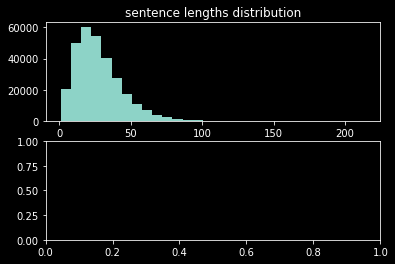

In [89]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.set_title('sentence lengths distribution')
ax1.hist(np_s_len, bins=30)

In [90]:
ax2.set_title('word lengths distribution')
ax2.hist(np_w_len, bins=len(set(np_w_len)))
plt.show()

## b)
Both word lenghts and sentence lengths are not normally distributed.

## c)
In tokenizer script we must consider many cases when we extract words from the data. Some cases are:

1. floating point numbers like 99.88, are they a word or two?
2. dates like 1.30 or 1.30.2019, are they a word or multiple words.
3. IDs like B5-0501, if we consider it to be a word, we must not remove the '-' while preprocessing.
4. We must not only consider ascii characters, but also other characters which form words. Such as é, è, ä, etc.
5. Not all punctuations are surrounded by spaces on each side. In the data we see punctuations that start at first or last char of the line.
